<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Евгений,-приветствую!" data-toc-modified-id="Евгений,-приветствую!-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Евгений, приветствую!</a></span></li><li><span><a href="#Изучение-данных-из-файла" data-toc-modified-id="Изучение-данных-из-файла-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Изучение данных из файла</a></span><ul class="toc-item"><li><span><a href="#Вывод" data-toc-modified-id="Вывод-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Вывод</a></span></li></ul></li><li><span><a href="#Предобработка-данных" data-toc-modified-id="Предобработка-данных-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Предобработка данных</a></span></li><li><span><a href="#Расчёты-и-добавление-результатов-в-таблицу" data-toc-modified-id="Расчёты-и-добавление-результатов-в-таблицу-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Расчёты и добавление результатов в таблицу</a></span></li><li><span><a href="#Исследовательский-анализ-данных" data-toc-modified-id="Исследовательский-анализ-данных-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Исследовательский анализ данных</a></span></li><li><span><a href="#Общий-вывод" data-toc-modified-id="Общий-вывод-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Общий вывод</a></span></li><li><span><a href="#Чек-лист-готовности-проекта" data-toc-modified-id="Чек-лист-готовности-проекта-7"><span class="toc-item-num">7&nbsp;&nbsp;</span>Чек-лист готовности проекта</a></span></li></ul></div>

# Исследование объявлений о продаже квартир

В вашем распоряжении данные сервиса Яндекс.Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктах за несколько лет. Нужно научиться определять рыночную стоимость объектов недвижимости. Ваша задача — установить параметры. Это позволит построить автоматизированную систему: она отследит аномалии и мошенническую деятельность. 

По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта, ближайшего парка и водоёма. 

## Изучение данных из файла

In [1]:
import pandas as pd
data = pd.read_csv('/datasets/real_estate_data.csv', sep='\t')
display(data)
data.info()
print(data['balcony'].unique())
#display(data[data['balcony'] >3])
print(data['ceiling_height'].value_counts())
print(data['rooms'].unique())

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.00,2019-03-07T00:00:00,3,2.70,16.0,51.0,8,NaN,...,25.00,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.40,2018-12-04T00:00:00,1,NaN,11.0,18.6,1,NaN,...,11.00,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.00,2015-08-20T00:00:00,2,NaN,5.0,34.3,4,NaN,...,8.30,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.00,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.00,2018-06-19T00:00:00,2,3.03,14.0,32.0,13,NaN,...,41.00,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23694,9,9700000.0,133.81,2017-03-21T00:00:00,3,3.70,5.0,73.3,3,NaN,...,13.83,NaN,Санкт-Петербург,24665.0,4232.0,1.0,796.0,3.0,381.0,NaN
23695,14,3100000.0,59.00,2018-01-15T00:00:00,3,NaN,5.0,38.0,4,NaN,...,8.50,NaN,Тосно,NaN,NaN,NaN,NaN,NaN,NaN,45.0
23696,18,2500000.0,56.70,2018-02-11T00:00:00,2,NaN,3.0,29.7,1,NaN,...,NaN,NaN,село Рождествено,NaN,NaN,NaN,NaN,NaN,NaN,NaN
23697,13,11475000.0,76.75,2017-03-28T00:00:00,2,3.00,17.0,NaN,12,NaN,...,23.30,2.0,Санкт-Петербург,39140.0,10364.0,2.0,173.0,3.0,196.0,602.0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
total_images            23699 non-null int64
last_price              23699 non-null float64
total_area              23699 non-null float64
first_day_exposition    23699 non-null object
rooms                   23699 non-null int64
ceiling_height          14504 non-null float64
floors_total            23613 non-null float64
living_area             21796 non-null float64
floor                   23699 non-null int64
is_apartment            2775 non-null object
studio                  23699 non-null bool
open_plan               23699 non-null bool
kitchen_area            21421 non-null float64
balcony                 12180 non-null float64
locality_name           23650 non-null object
airports_nearest        18157 non-null float64
cityCenters_nearest     18180 non-null float64
parks_around3000        18181 non-null float64
parks_nearest           8079 non-null float64
ponds_around300

### Вывод

В таблице много пропущенных данных, тип данных не позволяет производить вычисления, количество балконов завышено, высота в некоторых квартирах неправдоподобно высока, 19 комнат - слишком неправдоподобно

## Предобработка данных

In [2]:
data['balcony'] = data['balcony'].fillna(0).astype(int)
data['parks_around3000'] = data['parks_around3000'].fillna(0).astype(int)
data['ponds_around3000'] = data['ponds_around3000'].fillna(0).astype(int)

Данные в колонках "балконы", "количество водоемов" и "количество парков" пропущеные, скорее всего, по причине их отсутствия.
Данные колонки приводим к типу int, для возможности дальнейших вычислений.

<div class="alert alert-success">
<b>Комментарий ревьюера:</b>

Здорово, что используешь сцепку методов, тем самым оптимизируешь код внутри проекта.
    
</div>

In [3]:
data['parks_nearest'] = data['parks_nearest'].where(data['parks_around3000'] != 0, -1).astype(int)
data['ponds_nearest'] = data['ponds_nearest'].where(data['ponds_around3000'] != 0, -1).astype(int)
#data['parks_nearest'] = data[data['parks_around3000'] == 0]['parks_nearest'].fillna(0)
data.info()
display(data[data['parks_nearest'].isnull()])


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
total_images            23699 non-null int64
last_price              23699 non-null float64
total_area              23699 non-null float64
first_day_exposition    23699 non-null object
rooms                   23699 non-null int64
ceiling_height          14504 non-null float64
floors_total            23613 non-null float64
living_area             21796 non-null float64
floor                   23699 non-null int64
is_apartment            2775 non-null object
studio                  23699 non-null bool
open_plan               23699 non-null bool
kitchen_area            21421 non-null float64
balcony                 23699 non-null int64
locality_name           23650 non-null object
airports_nearest        18157 non-null float64
cityCenters_nearest     18180 non-null float64
parks_around3000        23699 non-null int64
parks_nearest           23699 non-null int64
ponds_around3000    

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition


В том случае если парки и озера отсутстуют, Заменяем растояие до парков и озер в пропущенных значениях на -1, чтобы их выделить.

In [4]:
#display(data[data['locality_name'].isnull()])
#print(data['locality_name'].unique())
data.dropna(subset =['floors_total', 'locality_name'], inplace = True)
data['floors_total'] = data['floors_total'].astype(int)
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23565 entries, 0 to 23698
Data columns (total 22 columns):
total_images            23565 non-null int64
last_price              23565 non-null float64
total_area              23565 non-null float64
first_day_exposition    23565 non-null object
rooms                   23565 non-null int64
ceiling_height          14481 non-null float64
floors_total            23565 non-null int64
living_area             21700 non-null float64
floor                   23565 non-null int64
is_apartment            2760 non-null object
studio                  23565 non-null bool
open_plan               23565 non-null bool
kitchen_area            21343 non-null float64
balcony                 23565 non-null int64
locality_name           23565 non-null object
airports_nearest        18041 non-null float64
cityCenters_nearest     18064 non-null float64
parks_around3000        23565 non-null int64
parks_nearest           23565 non-null int64
ponds_around3000      

Удалим строчки с пропущенными названиями населенных пунктов и количеством этажей.

In [5]:
ceiling_height_median = data['ceiling_height'].median()
data['ceiling_height'] = data['ceiling_height'].fillna(ceiling_height_median)
#print(data['ceiling_height'].value_counts())
print(data[data['ceiling_height'] > 3.5]['ceiling_height'].unique())
index_list = data.query('ceiling_height > 10').index
data.loc[index_list, 'ceiling_height'] = data.loc[index_list, 'ceiling_height']/10
print(data[data['ceiling_height'] > 3.5]['ceiling_height'].unique())

[  4.15   4.    25.     3.7    5.2    3.6    3.8    3.55   3.62   5.3
   5.     4.06   3.82   3.54   3.53   4.7    5.6    3.65   3.9    3.57
   3.98   3.83   3.52   3.95   3.75   3.67   3.87   3.66   3.85   3.86
   4.19   4.8    4.5    4.2   32.     3.68   8.     4.37  27.     4.1
  24.     3.63  26.     8.3    4.4    4.45   5.5    3.84   3.78   4.3
   4.65   3.56   3.51   3.93  14.     4.14   3.88   4.25  20.     3.76
   3.69   6.    22.6    3.58   5.8   27.5    4.9   10.3  100.     3.59]
[ 4.15  4.    3.7   5.2   3.6   3.8   3.55  3.62  5.3   5.    4.06  3.82
  3.54  3.53  4.7   5.6   3.65  3.9   3.57  3.98  3.83  3.52  3.95  3.75
  3.67  3.87  3.66  3.85  3.86  4.19  4.8   4.5   4.2   3.68  8.    4.37
  4.1   3.63  8.3   4.4   4.45  5.5   3.84  3.78  4.3   4.65  3.56  3.51
  3.93  4.14  3.88  4.25  3.76  3.69  6.    3.58  5.8   4.9  10.    3.59]


вероятнее всего значения выше 10 метров возникли по причине забытой запятой.

In [6]:
index_list = data.query('ceiling_height<1.9 or 7<ceiling_height').index
#print(data.loc[index_list, 'ceiling_height'])
data.drop(index_list, inplace=True, axis=0)
data.reset_index(drop = True)
data['ceiling_height'] = data['ceiling_height'] * 100
data['ceiling_height'] = data['ceiling_height'].astype(int)
display(data)
data.info()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.00,2019-03-07T00:00:00,3,270,16,51.0,8,NaN,...,25.00,0,Санкт-Петербург,18863.0,16028.0,1,482,2,755,NaN
1,7,3350000.0,40.40,2018-12-04T00:00:00,1,265,11,18.6,1,NaN,...,11.00,2,посёлок Шушары,12817.0,18603.0,0,-1,0,-1,81.0
2,10,5196000.0,56.00,2015-08-20T00:00:00,2,265,5,34.3,4,NaN,...,8.30,0,Санкт-Петербург,21741.0,13933.0,1,90,2,574,558.0
3,0,64900000.0,159.00,2015-07-24T00:00:00,3,265,14,NaN,9,NaN,...,NaN,0,Санкт-Петербург,28098.0,6800.0,2,84,3,234,424.0
4,2,10000000.0,100.00,2018-06-19T00:00:00,2,303,14,32.0,13,NaN,...,41.00,0,Санкт-Петербург,31856.0,8098.0,2,112,1,48,121.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23694,9,9700000.0,133.81,2017-03-21T00:00:00,3,370,5,73.3,3,NaN,...,13.83,0,Санкт-Петербург,24665.0,4232.0,1,796,3,381,NaN
23695,14,3100000.0,59.00,2018-01-15T00:00:00,3,265,5,38.0,4,NaN,...,8.50,0,Тосно,NaN,NaN,0,-1,0,-1,45.0
23696,18,2500000.0,56.70,2018-02-11T00:00:00,2,265,3,29.7,1,NaN,...,NaN,0,село Рождествено,NaN,NaN,0,-1,0,-1,NaN
23697,13,11475000.0,76.75,2017-03-28T00:00:00,2,300,17,NaN,12,NaN,...,23.30,2,Санкт-Петербург,39140.0,10364.0,2,173,3,196,602.0


<class 'pandas.core.frame.DataFrame'>
Int64Index: 23555 entries, 0 to 23698
Data columns (total 22 columns):
total_images            23555 non-null int64
last_price              23555 non-null float64
total_area              23555 non-null float64
first_day_exposition    23555 non-null object
rooms                   23555 non-null int64
ceiling_height          23555 non-null int64
floors_total            23555 non-null int64
living_area             21690 non-null float64
floor                   23555 non-null int64
is_apartment            2758 non-null object
studio                  23555 non-null bool
open_plan               23555 non-null bool
kitchen_area            21335 non-null float64
balcony                 23555 non-null int64
locality_name           23555 non-null object
airports_nearest        18033 non-null float64
cityCenters_nearest     18056 non-null float64
parks_around3000        23555 non-null int64
parks_nearest           23555 non-null int64
ponds_around3000        

квартивы с высотой потолка выше 7 метров - очень моловероятное явление, единичные случаи, как и квартиры с высотой потолков менее 1,9м. 
удалим строчки с этими квартирами и перезапишем индексацию.
для дальнейшего удобства переведем размеры в сантиметры и изменим тип колонки

In [7]:
print(data['studio'].value_counts(), " // Тип = ", data['studio'].dtypes)

False    23409
True       146
Name: studio, dtype: int64  // Тип =  bool


In [8]:
display(data.loc[data['studio']==True, ['total_area', 'living_area', 'kitchen_area']])
print('Количество пропущенных значений в колонке ПЛОЩАДЬ КУХНИ в выборке из студий:',data.loc[data['studio']==True]['kitchen_area'].isna().sum())



,total_area,living_area,kitchen_area
144,27.00,15.50,NaN
440,27.11,24.75,NaN
608,25.00,NaN,NaN
697,24.10,17.50,NaN
716,17.00,12.00,NaN
...,...,...,...
22867,30.00,18.20,NaN
22877,28.00,18.00,NaN
23210,26.00,18.00,NaN
23554,26.00,NaN,NaN


Количество пропущенных значений в колонке ПЛОЩАДЬ КУХНИ в выборке из студий: 146


Владельцы студий не указывали площадь кухни.

In [9]:
print("Студий Всего",len(data.loc[data['studio']==True]))
print()
print("Студий с заполненными значениями", data.loc[data['studio']==True, 'living_area'].describe())
print(data['studio'].value_counts())

Студий Всего 146

Студий с заполненными значениями count    139.000000
mean      18.995396
std        7.345598
min        2.000000
25%       16.000000
50%       18.000000
75%       19.850000
max       68.000000
Name: living_area, dtype: float64
False    23409
True       146
Name: studio, dtype: int64


Есть слишком маленькие площади, скорее всего забыли 0 в конце.

       living_area  total_area
144          15.50       27.00
440          24.75       27.11
697          17.50       24.10
716          12.00       17.00
1173         17.00       29.00
...            ...         ...
22832        16.80       28.00
22867        18.20       30.00
22877        18.00       28.00
23210        18.00       26.00
23637        17.00       26.00

[139 rows x 2 columns]


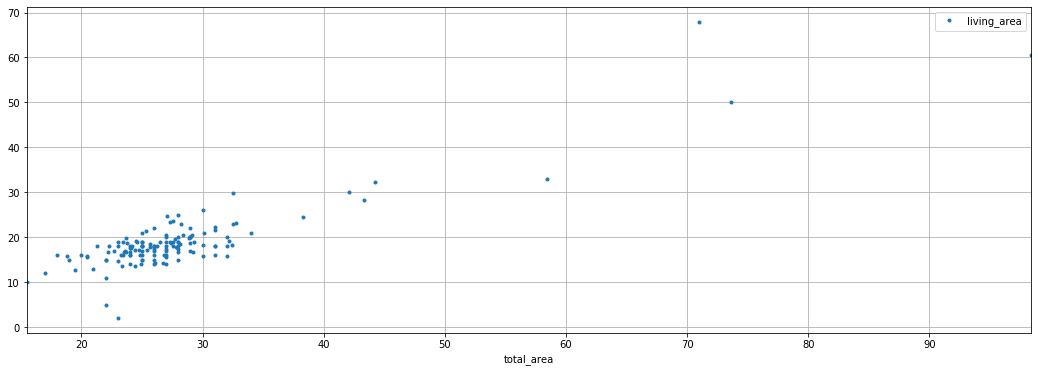

In [10]:
graf = pd.DataFrame() # [Вся_площадь, Жилая]
graf['living_area'] = data.loc[(data['living_area'].isna() == False) & (data['studio']==True), 'living_area']
graf['total_area'] = data.loc[(data['living_area'].isna() == False) & (data['studio']==True), 'total_area']
print(graf)

graf.plot(y='living_area', x='total_area', style=".", figsize=(18,6), grid=True);

есть значения где жилая площадь совсем маленькая

In [11]:
index_list = data[(data['living_area']<10) & (data['studio']==True)].index
print(index_list)
data.drop(labels = index_list, axis = 0, inplace = True)
data = data.reset_index(drop=True)
data.info()


Int64Index([17582, 21758], dtype='int64')
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23553 entries, 0 to 23552
Data columns (total 22 columns):
total_images            23553 non-null int64
last_price              23553 non-null float64
total_area              23553 non-null float64
first_day_exposition    23553 non-null object
rooms                   23553 non-null int64
ceiling_height          23553 non-null int64
floors_total            23553 non-null int64
living_area             21688 non-null float64
floor                   23553 non-null int64
is_apartment            2758 non-null object
studio                  23553 non-null bool
open_plan               23553 non-null bool
kitchen_area            21335 non-null float64
balcony                 23553 non-null int64
locality_name           23553 non-null object
airports_nearest        18032 non-null float64
cityCenters_nearest     18055 non-null float64
parks_around3000        23553 non-null int64
parks_nearest           235

Удалим их

In [12]:
print("Кол-во студий с заполнеными значением 'жилая площадь' =", 
      data.loc[(data['living_area'].isna() == False) & (data['studio']==True),
        'living_area'].count(), " // Кол-во студий всего =", data.loc[data['studio']==True, 'total_area'].count())
print()
part_live_in_studio = data.loc[data['studio']==True, 'living_area'] / data.loc[data['studio']==True, 'total_area']
print(part_live_in_studio.head())
print()

# Средняя доля жилой в студиях
part_live_in_studio = part_live_in_studio.dropna().mean() # Удаляем строки с NaN и считаем среднее
print("Средняя доля жилой площади в студии =", part_live_in_studio)
print()

# Меняем значение жилой в студии на = доля*общую
data.loc[(data['living_area'].isna() == True) & (data['studio']==True), 'living_area'] = (
   data.loc[(data['living_area'].isna() == True) & (data['studio']==True), 'total_area'] * part_live_in_studio)
data.info()

Кол-во студий с заполнеными значением 'жилая площадь' = 137  // Кол-во студий всего = 144

144    0.574074
438    0.912947
605         NaN
693    0.726141
712    0.705882
dtype: float64

Средняя доля жилой площади в студии = 0.6891845871726122

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23553 entries, 0 to 23552
Data columns (total 22 columns):
total_images            23553 non-null int64
last_price              23553 non-null float64
total_area              23553 non-null float64
first_day_exposition    23553 non-null object
rooms                   23553 non-null int64
ceiling_height          23553 non-null int64
floors_total            23553 non-null int64
living_area             21695 non-null float64
floor                   23553 non-null int64
is_apartment            2758 non-null object
studio                  23553 non-null bool
open_plan               23553 non-null bool
kitchen_area            21335 non-null float64
balcony                 23553 non-null int64
locality_

In [13]:
sq = pd.DataFrame()
sq['all'] = data.loc[(data['total_area'].isna() == False) & (data['studio']==False), 'total_area']
sq['liv'] = data.loc[(data['living_area'].isna() == False) & (data['studio']==False), 'living_area']
sq['kit'] = data.loc[(data['kitchen_area'].isna() == False) & (data['studio']==False), 'kitchen_area']
print(sq)

data.info()

          all   liv    kit
0      108.00  51.0  25.00
1       40.40  18.6  11.00
2       56.00  34.3   8.30
3      159.00   NaN    NaN
4      100.00  32.0  41.00
...       ...   ...    ...
23548  133.81  73.3  13.83
23549   59.00  38.0   8.50
23550   56.70  29.7    NaN
23551   76.75   NaN  23.30
23552   32.30  12.3   9.00

[23409 rows x 3 columns]
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23553 entries, 0 to 23552
Data columns (total 22 columns):
total_images            23553 non-null int64
last_price              23553 non-null float64
total_area              23553 non-null float64
first_day_exposition    23553 non-null object
rooms                   23553 non-null int64
ceiling_height          23553 non-null int64
floors_total            23553 non-null int64
living_area             21695 non-null float64
floor                   23553 non-null int64
is_apartment            2758 non-null object
studio                  23553 non-null bool
open_plan               23553 non-null b

Для удобства сделаем отдельный ДатаФрейм (без Студий)

In [14]:
part_kit = sq['kit'] / sq['all']
part_kit_median = part_kit.dropna().median()
part_kit_mean = part_kit.dropna().mean()
print("part_kit_median =", part_kit_median, "// part_kit_mean =", part_kit_mean)
print()
part_liv = sq['liv'] / sq['all']
part_liv_median = part_liv.dropna().median()
part_liv_mean = part_liv.dropna().mean()
print("part_liv_median =", part_liv_median, "// part_liv_mean =", part_liv_mean)

part_kit_median = 0.17235772357723578 // part_kit_mean = 0.18733202297286625

part_liv_median = 0.5673758865248227 // part_liv_mean = 0.5642044816001469


выбираем медианные значения

In [15]:
ind_nan_kit = data.loc[(data['kitchen_area'].isna() == True) & (data['studio']==False)].index # Индексы где пропуски в значениях 'kitchen_area'
data.loc[ind_nan_kit, 'kitchen_area'] = part_kit_median * data.loc[ind_nan_kit, 'total_area']
print(data['kitchen_area'].describe())

ind_all_kit = data.loc[(data['studio']==False)].index
data.loc[ind_all_kit, 'ratio_kitchen_total_area'] = data['kitchen_area']/data['total_area']
data.loc[ind_all_kit, 'ratio_kitchen_total_area_median'] = part_kit_median
data.update(data.loc[data['studio']==True]['ratio_kitchen_total_area'].fillna(-1))
data.update(data.loc[data['studio']==True]['ratio_kitchen_total_area_median'].fillna(-1))

data.info()

count    23409.000000
mean        10.521773
std          6.028488
min          1.300000
25%          7.000000
50%          9.000000
75%         12.000000
max        112.000000
Name: kitchen_area, dtype: float64
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23553 entries, 0 to 23552
Data columns (total 24 columns):
total_images                       23553 non-null int64
last_price                         23553 non-null float64
total_area                         23553 non-null float64
first_day_exposition               23553 non-null object
rooms                              23553 non-null int64
ceiling_height                     23553 non-null int64
floors_total                       23553 non-null int64
living_area                        21695 non-null float64
floor                              23553 non-null int64
is_apartment                       2758 non-null object
studio                             23553 non-null bool
open_plan                          23553 non-null bool
kit

заполним пропуски в площадях кухонь.
И добавим колонки соотношегние площади кухни к общей и медианное соотношение, а для студий укажем не типичные значения

In [16]:
ind_nan_liv = data.loc[(data['living_area'].isna() == True) & (data['studio']==False)].index # Индексы где пропуски в значениях 'living_area'
data.loc[ind_nan_liv, 'living_area'] = part_liv_median * data.loc[ind_nan_liv, 'total_area']
print(data['kitchen_area'].describe())

ind_all_liv = data.loc[(data['studio']==False)].index
data.loc[ind_all_liv, 'ratio_living_total_area'] = data['living_area']/data['total_area']
data.loc[ind_all_liv, 'ratio_living_total_area_median'] = part_kit_median
data.update(data.loc[data['studio']==True]['ratio_living_total_area'].fillna(-1))
data.update(data.loc[data['studio']==True]['ratio_living_total_area_median'].fillna(-1))


count    23409.000000
mean        10.521773
std          6.028488
min          1.300000
25%          7.000000
50%          9.000000
75%         12.000000
max        112.000000
Name: kitchen_area, dtype: float64


In [17]:
data.update(data.loc[data['studio']==True]['kitchen_area'].fillna(-1))

print(data['kitchen_area'].describe())
data.info()

count    23553.000000
mean        10.451331
std          6.076772
min         -1.000000
25%          7.000000
50%          9.000000
75%         12.000000
max        112.000000
Name: kitchen_area, dtype: float64
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23553 entries, 0 to 23552
Data columns (total 26 columns):
total_images                       23553 non-null int64
last_price                         23553 non-null float64
total_area                         23553 non-null float64
first_day_exposition               23553 non-null object
rooms                              23553 non-null int64
ceiling_height                     23553 non-null int64
floors_total                       23553 non-null int64
living_area                        23553 non-null float64
floor                              23553 non-null int64
is_apartment                       2758 non-null object
studio                             23553 non-null bool
open_plan                          23553 non-null bool
kit

Видно что присутствуют слишком маленькие значения как в кухнях (min = 1,3), так и в жилых (min = 2)
так же заменим пропуски площади кухонь в выборке из студий на отрицательное значение.

И добавим колонки соотношегние жилой площади к общей и медианное соотношение, а для студий укажем не типичные значения

count    23409.000000
mean        10.521773
std          6.028488
min          1.300000
25%          7.000000
50%          9.000000
75%         12.000000
max        112.000000
Name: kit, dtype: float64

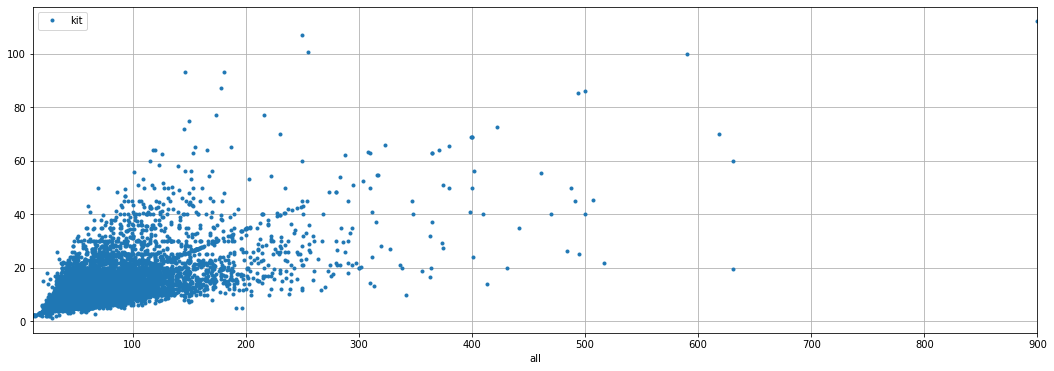

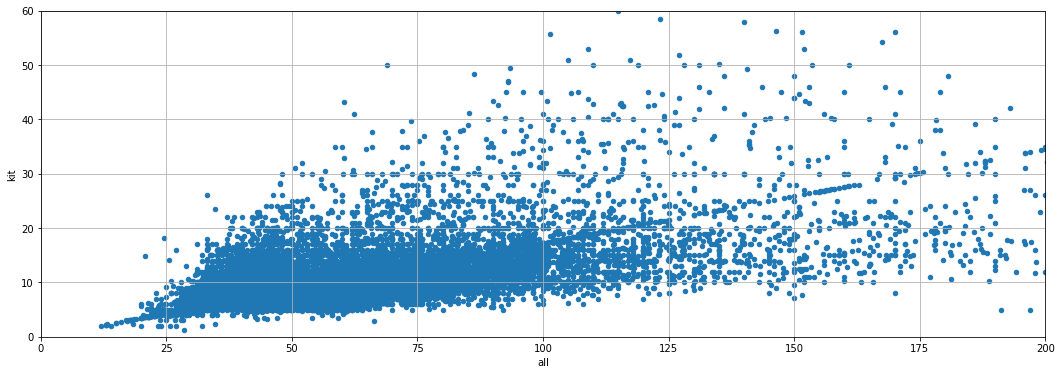

In [18]:
import matplotlib.pyplot as plt

sq = pd.DataFrame()
sq['all'] = data.loc[(data['total_area'].isna() == False) & (data['studio']==False), 'total_area']
sq['liv'] = data.loc[(data['living_area'].isna() == False) & (data['studio']==False), 'living_area']
sq['kit'] = data.loc[(data['kitchen_area'].isna() == False) & (data['studio']==False), 'kitchen_area']

sq.plot(y='kit', x='all', style=".", figsize=(18,6), grid=True);
plt.show
sq.plot(y='kit', x='all', kind='scatter', figsize=(18,6), grid=True, xlim=(0, 200), ylim=(0, 60));

sq['kit'].describe()

есть слишком маленькие и слишком большие значения (их мало) кухни. Установим разумные пределы кухни (min_kit = 3 и max_kit = 40) и все что выходит за эти пределы удалим.

In [19]:
min_kit = 3
max_kit = 40

index_list = data.loc[0<(data['kitchen_area']<min_kit) & (data['studio']==False), 'kitchen_area'].index

data.drop(labels = index_list, axis = 0, inplace = True)

index_list = data.loc[(data['kitchen_area']>max_kit) & (data['studio']==False), 'kitchen_area'].index
data.drop(labels = index_list, axis = 0, inplace = True)
data = data.reset_index(drop=True)
data['kitchen_area'] = data['kitchen_area'].fillna(-1).astype('int')

data.info()
data.loc[(data['studio']==False),'kitchen_area'].describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23381 entries, 0 to 23380
Data columns (total 26 columns):
total_images                       23381 non-null int64
last_price                         23381 non-null float64
total_area                         23381 non-null float64
first_day_exposition               23381 non-null object
rooms                              23381 non-null int64
ceiling_height                     23381 non-null int64
floors_total                       23381 non-null int64
living_area                        23381 non-null float64
floor                              23381 non-null int64
is_apartment                       2738 non-null object
studio                             23381 non-null bool
open_plan                          23381 non-null bool
kitchen_area                       23381 non-null int64
balcony                            23381 non-null int64
locality_name                      23381 non-null object
airports_nearest                   17868 non-

count    23237.000000
mean         9.979257
std          4.844056
min          3.000000
25%          7.000000
50%          9.000000
75%         11.000000
max         40.000000
Name: kitchen_area, dtype: float64

удалим выбросы

In [20]:
print(data['floor'].value_counts())

2     3324
3     3038
1     2887
4     2764
5     2588
6     1280
7     1201
8     1073
9     1042
10     677
11     516
12     516
13     374
15     339
14     331
16     312
17     225
18     173
19     142
21     119
22     110
20     108
23      98
24      60
25      44
26      24
27      10
28       1
33       1
29       1
30       1
32       1
31       1
Name: floor, dtype: int64


колонка в порядке

In [21]:
data.pop('is_apartment')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23381 entries, 0 to 23380
Data columns (total 25 columns):
total_images                       23381 non-null int64
last_price                         23381 non-null float64
total_area                         23381 non-null float64
first_day_exposition               23381 non-null object
rooms                              23381 non-null int64
ceiling_height                     23381 non-null int64
floors_total                       23381 non-null int64
living_area                        23381 non-null float64
floor                              23381 non-null int64
studio                             23381 non-null bool
open_plan                          23381 non-null bool
kitchen_area                       23381 non-null int64
balcony                            23381 non-null int64
locality_name                      23381 non-null object
airports_nearest                   17868 non-null float64
cityCenters_nearest                17890 no

колонка 'is_apartment' не нужна 

In [22]:
data['airports_nearest'] = data['airports_nearest'].fillna(-1).astype(int)
data['cityCenters_nearest'] = data['cityCenters_nearest'].fillna(-1).astype(int)
data['days_exposition'] = data['days_exposition'].fillna(-1).astype(int)
data['total_area'] = data['total_area'].astype(int)
data['living_area'] = data['living_area'].astype(int)

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23381 entries, 0 to 23380
Data columns (total 25 columns):
total_images                       23381 non-null int64
last_price                         23381 non-null float64
total_area                         23381 non-null int64
first_day_exposition               23381 non-null object
rooms                              23381 non-null int64
ceiling_height                     23381 non-null int64
floors_total                       23381 non-null int64
living_area                        23381 non-null int64
floor                              23381 non-null int64
studio                             23381 non-null bool
open_plan                          23381 non-null bool
kitchen_area                       23381 non-null int64
balcony                            23381 non-null int64
locality_name                      23381 non-null object
airports_nearest                   23381 non-null int64
cityCenters_nearest                23381 non-null

заменим пропуски "airports_nearest", "days_exposition" и "cityCenters_nearest" на не типичные значения

## Расчёты и добавление результатов в таблицу

Посчитайте и добавьте в таблицу
* цену квадратного метра;
* день недели, месяц и год публикации объявления;
* этаж квартиры; варианты — первый, последний, другой;
* соотношение жилой и общей площади, а также отношение площади кухни к общей.

In [23]:
data['m2_price']=data['last_price']/data['total_area']

добавим в таблицу цену квадратного метра

In [24]:
data['exposition_day'] = pd.DatetimeIndex(data['first_day_exposition']).day
data['exposition_month'] = pd.DatetimeIndex(data['first_day_exposition']).month
data['exposition_year'] = pd.DatetimeIndex(data['first_day_exposition']).year

display(data)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,studio,...,ponds_nearest,days_exposition,ratio_kitchen_total_area,ratio_kitchen_total_area_median,ratio_living_total_area,ratio_living_total_area_median,m2_price,exposition_day,exposition_month,exposition_year
0,20,13000000.0,108,2019-03-07T00:00:00,3,270,16,51,8,False,...,755,-1,0.231481,0.172358,0.472222,0.172358,120370.370370,7,3,2019
1,7,3350000.0,40,2018-12-04T00:00:00,1,265,11,18,1,False,...,-1,81,0.272277,0.172358,0.460396,0.172358,83750.000000,4,12,2018
2,10,5196000.0,56,2015-08-20T00:00:00,2,265,5,34,4,False,...,574,558,0.148214,0.172358,0.612500,0.172358,92785.714286,20,8,2015
3,0,64900000.0,159,2015-07-24T00:00:00,3,265,14,90,9,False,...,234,424,0.172358,0.172358,0.567376,0.172358,408176.100629,24,7,2015
4,10,2890000.0,30,2018-09-10T00:00:00,1,265,12,14,5,False,...,-1,55,0.299342,0.172358,0.473684,0.172358,96333.333333,10,9,2018
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23376,9,9700000.0,133,2017-03-21T00:00:00,3,370,5,73,3,False,...,381,-1,0.103356,0.172358,0.547792,0.172358,72932.330827,21,3,2017
23377,14,3100000.0,59,2018-01-15T00:00:00,3,265,5,38,4,False,...,-1,45,0.144068,0.172358,0.644068,0.172358,52542.372881,15,1,2018
23378,18,2500000.0,56,2018-02-11T00:00:00,2,265,3,29,1,False,...,-1,-1,0.172358,0.172358,0.523810,0.172358,44642.857143,11,2,2018
23379,13,11475000.0,76,2017-03-28T00:00:00,2,300,17,43,12,False,...,196,602,0.303583,0.172358,0.567376,0.172358,150986.842105,28,3,2017


добавим в таблицу день недели, месяц и год публикации объявления

In [25]:
def floor_insert(row):
    if row['floor']==1:
        return 'первый'
    elif row['floor']==row['floors_total']:
        return 'последний'
    else:
        return 'другой'

data['category_floor']=data.apply(floor_insert, axis=1)
print(data['category_floor'].value_counts())

другой       17200
последний     3294
первый        2887
Name: category_floor, dtype: int64


Создадим новый столбец с категорией этажей. Варианты — первый, последний, другой.

Соотношение жилой и общей площади, а также отношение площади кухни к общей ранее.

## Исследовательский анализ данных

* Изучите следующие параметры: площадь, цена, число комнат, высота потолков. Постройте гистограммы для каждого параметра.
* Изучите время продажи квартиры. Постройте гистограмму. Посчитайте среднее и медиану. Опишите, сколько обычно занимает продажа. Когда можно считать, что продажи прошли очень быстро, а когда необычно долго?
* Уберите редкие и выбивающиеся значения. Опишите, какие особенности обнаружили.
* Какие факторы больше всего влияют на стоимость квартиры? Изучите, зависит ли цена от площади, числа комнат, удалённости от центра. Изучите зависимость цены от того, на каком этаже расположена квартира: первом, последнем или другом. Также изучите зависимость от даты размещения: дня недели, месяца и года.
* Выберите 10 населённых пунктов с наибольшим числом объявлений. Посчитайте среднюю цену квадратного метра в этих населённых пунктах. Выделите населённые пункты с самой высокой и низкой стоимостью жилья. Эти данные можно найти по имени в столбце locality_name.
* Изучите предложения квартир: для каждой квартиры есть информация о расстоянии до центра. Выделите квартиры в Санкт-Петербурге (locality_name). Ваша задача — выяснить, какая область входит в центр. Создайте столбец с расстоянием до центра в километрах: округлите до целых значений. После этого посчитайте среднюю цену для каждого километра. Постройте график: он должен показывать, как цена зависит от удалённости от центра. Определите границу, где график сильно меняется, — это и будет центральная зона.
* Выделите сегмент квартир в центре. Проанализируйте эту территорию и изучите следующие параметры: площадь, цена, число комнат, высота потолков. Также выделите факторы, которые влияют на стоимость квартиры (число комнат, этаж, удалённость от центра, дата размещения объявления). Сделайте выводы. Отличаются ли они от общих выводов по всему городу?

Гистограмма по колнке "total_area"


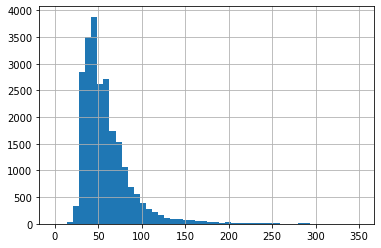

Гистограмма по колнке "last_price"


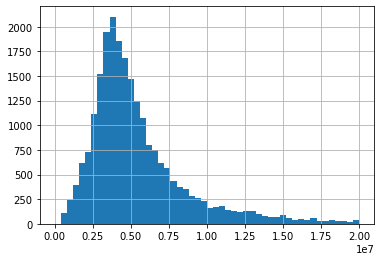

Гистограмма по колнке "rooms"


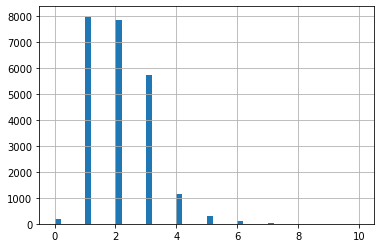

Гистограмма по колнке "ceiling_height"


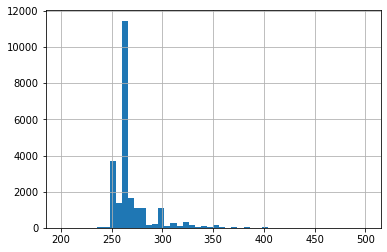

In [26]:
print('Гистограмма по колнке "total_area"')
data['total_area'].hist(bins=50, range=(0, 350))
plt.show()
print('Гистограмма по колнке "last_price"')
data['last_price'].hist(bins=50, range=(0, 20000000))
plt.show()
print('Гистограмма по колнке "rooms"')
data['rooms'].hist(bins=50, range=(0, 10))
plt.show()
print('Гистограмма по колнке "ceiling_height"')
data['ceiling_height'].hist(bins=50, range=(200, 500))

* Гистограмма по столбцу total_area выглядит нормальной - квартир площадью менее 25 кв.м почти нет, большая доля квартир имеет площадь 30-60 кв.м, также видим мощный пик у значения 45 кв.м. После значения 100 кв.м число квартир стремительно убывает.
* График по столбцу last_price имеет нормальный вид. Можно отметить пик у значения цены 3 млн.
* График по столбцу rooms имеет нормальный вид. У большинства квартир 1-3 комнаты. Видим небольшой сегмент с безкомнат - студий.
* График по столбцу ceiling_height показывает, что у большей части квартир высота потолков 270 см.

Гистограмма по колнке "days_exposition"


count    23381.00000
mean       155.83230
std        212.83358
min         -1.00000
25%         22.00000
50%         73.00000
75%        198.00000
max       1580.00000
Name: days_exposition, dtype: float64

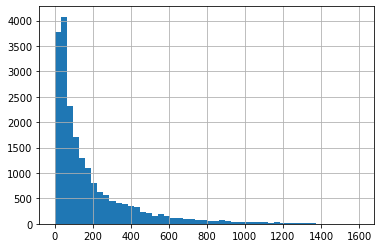

In [27]:
print('Гистограмма по колнке "days_exposition"')
data['days_exposition'].hist(bins=50, range=(0, 1600))
data['days_exposition'].describe()

График по столбцу days_exposition имеет распределение Пуассона. Можно считать, что сделка прошла быстро, если продажа состоялась в срок до 60 дней после подачи объявления, а если сделка состоялась через 190 и больше дней - она длилась долго.
Разница среднего и медианы говорит о том, что в распределении длинный хвост высоких значений, влияющих на среднее, но не на медиану. Действительно, видим, что третий квартиль у нас заканчивается на значении 198, а максимальное значение - целых 1580 дней. Как видим по графикам, нормальные значения находятся в промежутке от 0 до 410.

count    20901.000000
mean        96.057557
std        100.532531
min          1.000000
25%         18.000000
50%         60.000000
75%        143.000000
max        410.000000
Name: days_exposition, dtype: float64

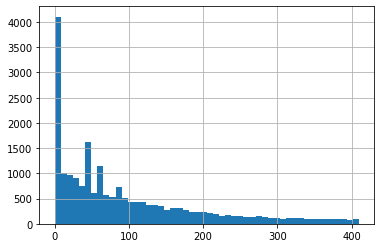

In [28]:
ind = data.loc[(data['days_exposition'] < 0)].index
data.loc[ind, 'days_exposition'] = -1 * data.loc[ind, 'days_exposition']

data = data.query('days_exposition<=410')

data['days_exposition'].hist(bins=50, range=(0, 410))
data['days_exposition'].describe()

Заменим отрицательные числа на аналогичные положительные и уберем из таблицы редкие и выбивающиеся значения.

In [29]:
index = data.index 
price_rooms_area_corr = data.pivot_table(index=index, values=['total_area','rooms', 'm2_price'], aggfunc='mean')

price_rooms_area_corr.corr()

,m2_price,rooms,total_area
m2_price,1.000000,0.019057,0.256510
rooms,0.019057,1.000000,0.772658
total_area,0.256510,0.772658,1.000000


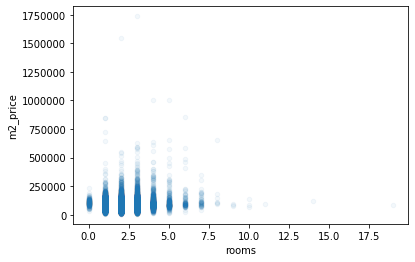

In [30]:
price_rooms_area_corr.plot(kind='scatter', x='rooms', y='m2_price', alpha=0.05)

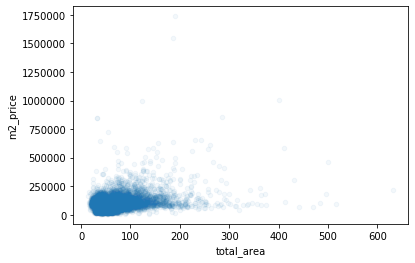

In [31]:
price_rooms_area_corr.plot(kind='scatter', x='total_area', y='m2_price', alpha=0.05)

Наибольшая зависимость между количеством комнат и площадью, что логично.

In [41]:
distance_from_center = data.query('cityCenters_nearest != -1')
data['m2_price'].corr(distance_from_center['cityCenters_nearest'])

-0.3265305407831698

Исключим из анализа стойчи с нетипичными значениями.

Корелляция показывает то, что есть зависимость обратная, но не очень сильная. Увеличение расстояния от центра связано с уменьшением стоимости квартиры

In [57]:
price_and_floor_types = data.loc[:, ['category_floor', 'm2_price']]

price_and_floor_types_corr = price_and_floor_types.category_floor.str.get_dummies(sep=' ')\
.corrwith(price_and_floor_types.m2_price)

price_and_floor_types_corr

другой       0.145088
первый      -0.133632
последний   -0.057932
dtype: float64

Видим, что квартиры, расположенные на первом и последнем этаже, стоят дешевле, чем на любом другом.

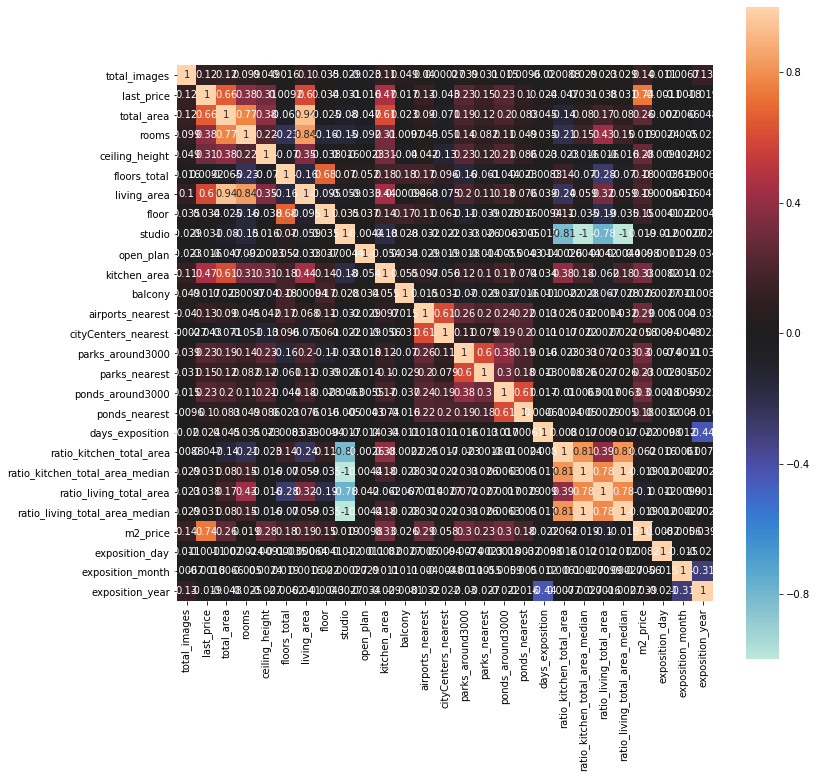

In [59]:
import seaborn
fig, ax = plt.subplots(figsize=(12,12))
seaborn.heatmap(data.corr(), annot=True, square=True, vmin=-1, vmax=1, center=0, ax=ax)

С помощью графика можем отметить, что сильнее всего связь у параметра m2_price с last_price(логично), общей и жилой площадью, площадью кухни, а так же инфраструктурой вокруг (парки, водоемы, аэропорты).

In [61]:
exposition_date = data.pivot_table(index=index, values=['exposition_day', 'exposition_month', 'exposition_year', 'm2_price'], aggfunc='mean')
exposition_date.corr()

,exposition_day,exposition_month,exposition_year,m2_price
exposition_day,1.000000,-0.015296,-0.021284,0.008217
exposition_month,-0.015296,1.000000,-0.311514,-0.005607
exposition_year,-0.021284,-0.311514,1.000000,0.039112
m2_price,0.008217,-0.005607,0.039112,1.000000


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fdb429cb610>,
      dtype=object)

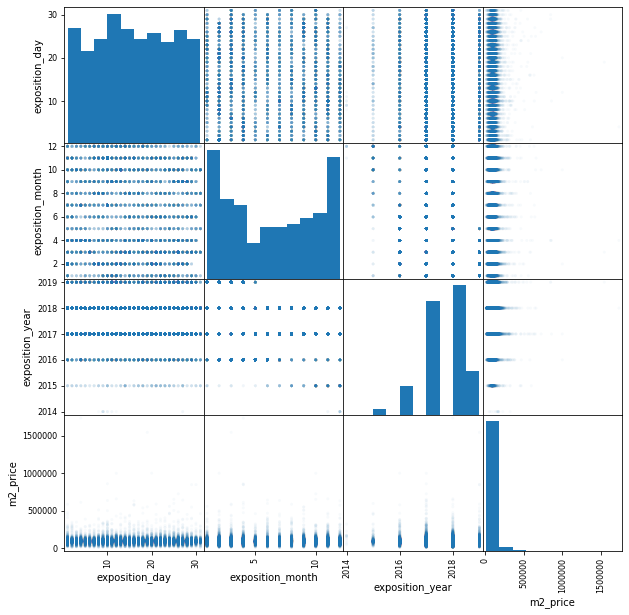

In [62]:
pd.plotting.scatter_matrix(exposition_date, figsize=(10, 10), alpha=0.03)

Можем отметить тенденцию роста цен от года к году, однако дороже всего квартиры стоили в 2018.

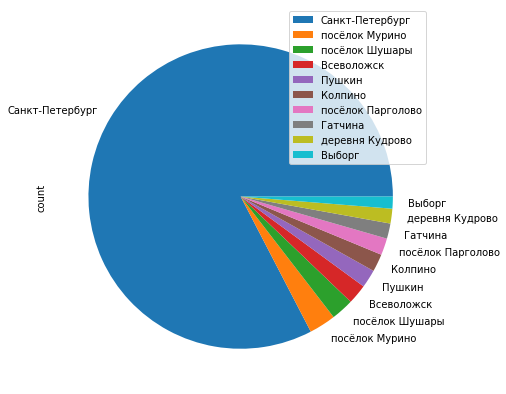

In [63]:
locality_sq_m_price = data.loc[:, ['locality_name', 'm2_price']]
locality_sq_m_price = locality_sq_m_price.pivot_table(index='locality_name', values='m2_price', aggfunc=['count', 'mean'])
locality_sq_m_price.columns = ['count', 'mean_m2_price']
top10_locality = locality_sq_m_price.sort_values(by='count', ascending=False).head(10)
top10_locality.plot(y='count', kind='pie', figsize=(7, 7))

In [64]:
top10_locality

,count,mean_m2_price
locality_name,,
Санкт-Петербург,13804,113931.603274
посёлок Мурино,474,86522.146213
посёлок Шушары,401,79138.418508
Всеволожск,350,69325.901292
Пушкин,322,103087.062015
Колпино,314,75666.963779
посёлок Парголово,298,90165.530993
Гатчина,270,69334.783797
деревня Кудрово,262,93255.089976


Выберем 10 населённых пунктов с наибольшим числом объявлений. Посчитем среднюю цену квадратного метра в этих населённых пунктах. Выделим населённые пункты с самой высокой и низкой стоимостью жилья.

Дороже всего кадратный метр стоит в Санкт-Петербурге (что неудивительно) и в Пушкине. Дешевле всего квартиру можно купить в Выборге.

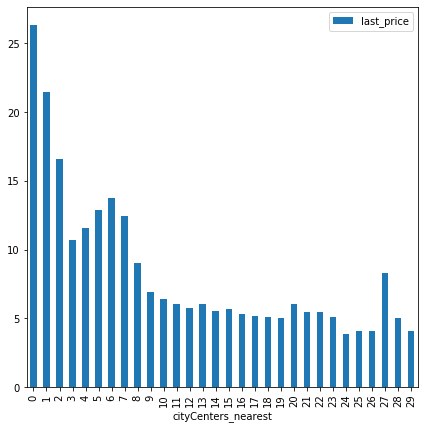

In [65]:
flats_in_spb = data.query('locality_name == "Санкт-Петербург"')
flats_in_spb = flats_in_spb.query('cityCenters_nearest != -1')
flats_in_spb_price = flats_in_spb.loc[:, ['locality_name', 'cityCenters_nearest','last_price']]
#приводим расстояние в км, округляем
flats_in_spb_price['cityCenters_nearest'] = (flats_in_spb_price['cityCenters_nearest']/1000).round().astype(int)
#приводим цену в млн
flats_in_spb_price['last_price'] = flats_in_spb_price['last_price']/1000000
flats_in_spb_pivot = flats_in_spb_price.pivot_table(index='cityCenters_nearest', values='last_price', aggfunc=('mean'))
flats_in_spb_pivot.plot(y='last_price', kind='bar', figsize=(7, 7))

Выделим квартиры в Санкт-Петербурге и выясним, какая область входит в центр. Расстояние до центра приведем в километры и округлим до целых значений. Посчитаем среднюю цену для каждого километра. Затем построим график, который покажет, как цена зависит от удалённости от центра.

Начиная с третьего километра цена сильно падает. С 4 по 7 километры также есть небольшой всплеск стоимости. Будем считать центром километры с 0 по 2 включительно.

In [67]:
flats_in_spb_center = flats_in_spb.query('cityCenters_nearest != -1')
flats_in_spb_center['cityCenters_nearest'] = (flats_in_spb_center['cityCenters_nearest']/1000).round().astype(int)
flats_in_spb_center = flats_in_spb_center.query('cityCenters_nearest < 3')

Гистограмма по колнке "total_area"


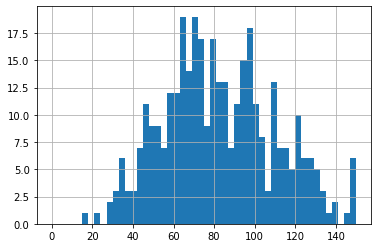

Гистограмма по колнке "last_price"


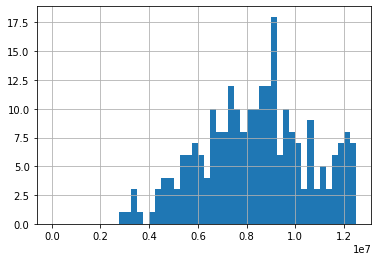

Гистограмма по колнке "rooms"


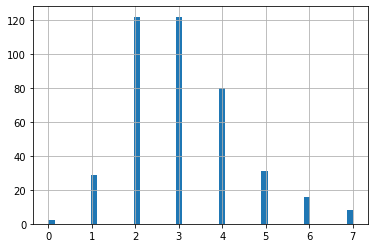

Гистограмма по колнке "ceiling_height"


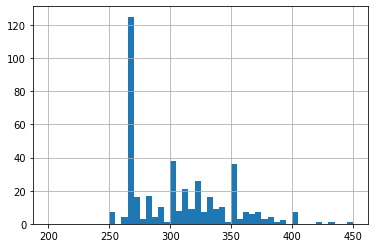

In [73]:
print('Гистограмма по колнке "total_area"')
flats_in_spb_center['total_area'].hist(bins=50, range=(0, 150))
plt.show()
print('Гистограмма по колнке "last_price"')
flats_in_spb_center['last_price'].hist(bins=50, range=(0, 12500000))
plt.show()
print('Гистограмма по колнке "rooms"')
flats_in_spb_center['rooms'].hist(bins=50, range=(0, 7))
plt.show()
print('Гистограмма по колнке "ceiling_height"')
flats_in_spb_center['ceiling_height'].hist(bins=50, range=(200, 450))
plt.show()

Для центра Питера изучим следующие параметры: площадь, цена, число комнат, высота потолков.


О квартирах в центре Санкт-Петербурга можем сделать следующие выводы:
* они имеют бОльшую площадь - 70-80 кв.м (против 45-50 кв.м);
* их стоимость гораздо больше - если на общем графике пиковое значение цены было 3 млн, то здесь это значение почти в 3 раза больше;
* количество комнат в них больше - в основном, 2-3 комнаты (против 1-3);
* потолки в большинстве случаев не отличаются от других частей города

Выделим факторы, которые влияют на стоимость квартиры (число комнат, этаж, удалённость от центра, дата размещения объявления).

In [74]:
flats_in_spb_center['m2_price'].corr(flats_in_spb_center['rooms'])

-0.06067040913006872

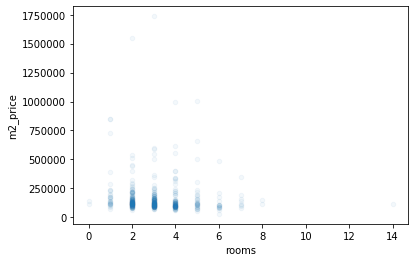

In [76]:
flats_in_spb_center.plot(x='rooms', y='m2_price', kind='scatter', alpha=0.05)

В центре Санкт-Петербурга стоимость  и количество комнат связаны больше. С увеличением комнат в квартире стоимость квадратного метра уменьшается.

In [77]:
flats_in_spb_center['m2_price'].corr(flats_in_spb_center['cityCenters_nearest'])

-0.09112877254736705

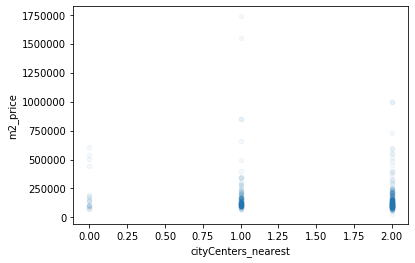

In [78]:
flats_in_spb_center.plot(x='cityCenters_nearest', y='m2_price', kind='scatter', alpha=0.05)

Взаимосвязь этих двух параметров в центре Питера очень слабая. У нас мало объявлений на нулевом и первом километре Санкт-Петербурга, но по данным, которые есть, можно судить, что стоимость практически не меняется.

In [80]:
flats_in_spb_center_floor_types = flats_in_spb_center.loc[:, ['category_floor', 'm2_price']]

flats_in_spb_center_floor_types_corr = flats_in_spb_center_floor_types.category_floor.str.get_dummies(sep=' ').corrwith(flats_in_spb_center_floor_types.m2_price)
flats_in_spb_center_floor_types_corr

другой       0.085301
первый      -0.070092
последний   -0.039229
dtype: float64

Квартиры на первом и последнем этаже также дешевле, взаимосвязь на том же уровне.

In [82]:
index1 = flats_in_spb_center.index
exposition_date_spb = flats_in_spb_center.pivot_table(index=index1, values=['exposition_day', 'exposition_month', 'exposition_year', 'm2_price'], aggfunc='mean')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fdb41a751d0>,
      dtype=object)

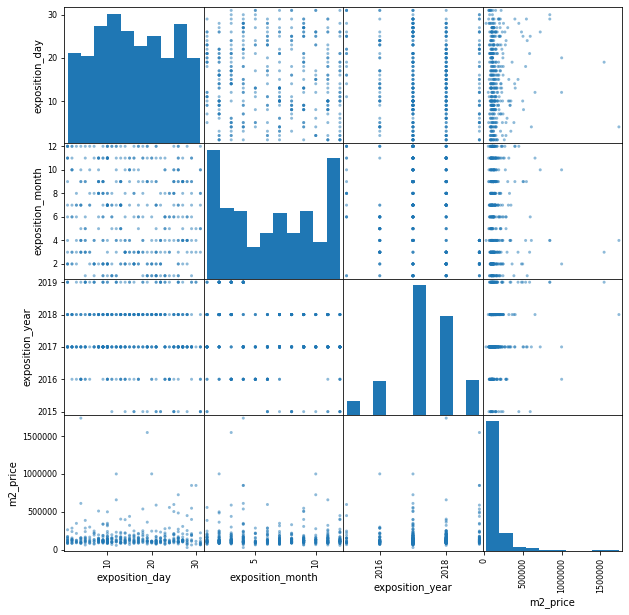

In [83]:
pd.plotting.scatter_matrix(exposition_date_spb, figsize=(10, 10))

Данных за 2015 год отсутствуют
Дороже всего квартиры стоили в 2017 и 2018 годах. Тенденция постепенного роста цен сохраняется.

## Общий вывод

* от дня размещения объявления до продажи квартиры обычно проходит до 100 дней;
* дороже всего кадратный метр стоит в Санкт-Петербурге и в Пушкине, дешевле всего квартиру можно купить в Выборге;
* квартиры на первом и последнем этаже дешевле, чем на любом другом;
* отдаление от центра города связано с уменьшением стоимости недвижимости, при этом центральной цасти Питера это не касается - здесь квартиры одинаково дорогие;
* квартиры в центре Питера имеют большую площадь, чем в других районах и населенных пунктах;
* стоимость квартир в центре Питера гораздо больше - почти в 3 раза;
* количество комнат в квартирах в центре Питера больше - в основном, 2-3 комнаты (против 1-3), потолки в большинстве случаев не отличаются от других частей города;
* обнаружилась следующая cвязь между временем размещения объявления и стоимостью квартиры: квартиры, выставленные на продажу в декабре и январе дороже, чем в другие месяцы; квартиры, выставленные на продажу на выходных, дешевле, чем в другие дни недели; квартиры были дороже всего в 2017 и 2018 году для центра С-П и в 2018 для всех остальных районов и населенных пунктов.